In [860]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV, cross_val_score
%matplotlib inline
from xgboost import XGBClassifier, XGBRegressor
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import datasets
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, auc, roc_curve, mean_squared_error, r2_score
from mlxtend.plotting import plot_confusion_matrix, plot_decision_regions

In [861]:
#wczytanie danych
df = pd.read_csv("winequality-red.csv")

In [862]:
#Zapoznanie się z tabelą
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [863]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [864]:
#Szukanie pustych komórek
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [865]:
df['quality'].value_counts()
#Normalnych win jest znacznie więcej niż doskonałych lub słabych

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

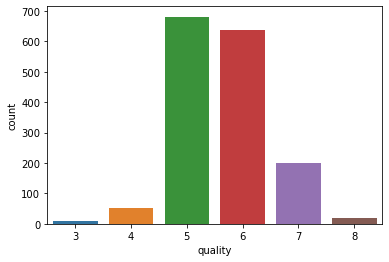

In [866]:
sns.countplot(x='quality',data=df)

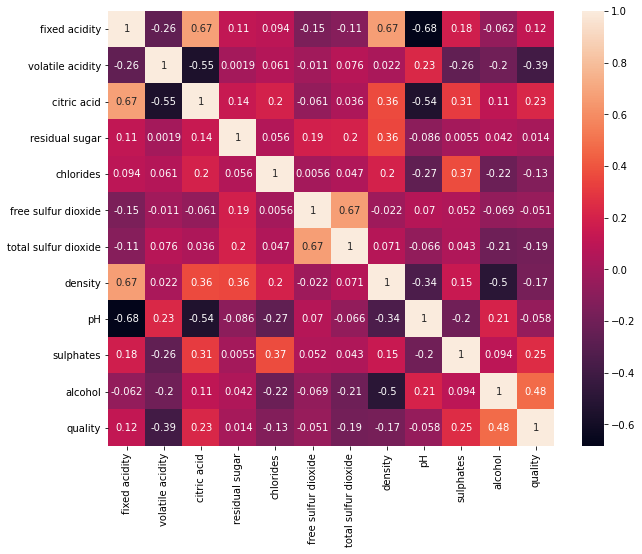

In [867]:
corr = df.corr()
#Wykres
fig, ax = plt.subplots(figsize=(10, 8))
#Mapa korealcji
sns.heatmap(corr, annot=True)
# Nie znaleziono wysokiej kolelacji parametrów cieczy i jakości

In [868]:
#Podział win na dobre i gorsze jakościowo
bins = (2, 6.5, 8)
group_names = ['rest', 'good']
df['quality'] = pd.cut(df['quality'], bins = bins, labels = group_names)
# Od 6.5 do 8 dobre, poniżej "reszta"

In [869]:
df.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,rest
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,rest
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,rest
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,rest
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,rest
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,rest
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,rest
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,good
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,rest


In [870]:
df['quality'].value_counts()

rest    1382
good     217
Name: quality, dtype: int64

In [871]:
#Użycie LabelEncodera pozwala na przekształcanie funkcji katagorycznych w funkcje numeryczne.
label_quality = LabelEncoder()

In [872]:
df['quality'] = label_quality.fit_transform(df['quality'])

In [873]:
df['quality'].value_counts()

1    1382
0     217
Name: quality, dtype: int64

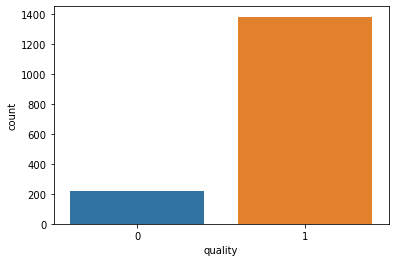

In [874]:
sns.countplot(x='quality',data=df)

In [875]:
#Przygotowanie do treningu

In [876]:
#Rozdzielenie df na X i y
X = df.drop('quality', axis = 1)
y = df['quality']

In [877]:
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [878]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    1
1595    1
1596    1
1597    1
1598    1
Name: quality, Length: 1599, dtype: int64

In [879]:
#Parametry dla poszczególnych modeli
params = [
    {
        'C': [0.01, 1, 10, 100]   #linear regression
    }
    ,
    {
        'max_depth': [3, 5, 8]  #decision tree
    }
    ,
    {
        'min_samples_leaf': [1, 2, 5]  #random forest
    }
    ,
    {
        'learning_rate': [0.01, 0.1, 1]  #XGB
    }
    ,
    {
        'C': [0.1, 1, 10, 100]  #svm
    }
    ,
    {
        'n_neighbors': [3, 5, 8]  #knn
    }
]

In [880]:
#Modele
models = [
    LogisticRegression(),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    SVC(),
    KNeighborsClassifier()
]


In [881]:
#Podział dane na treningowe i testowe
testSize = 0.2
randomState = 42
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = testSize, random_state = randomState)

In [882]:
#Normalizacja i fit
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       0.71      0.26      0.37        47
           1       0.88      0.98      0.93       273

    accuracy                           0.88       320
   macro avg       0.80      0.62      0.65       320
weighted avg       0.86      0.88      0.85       320

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presor

/Users/alinabaranowska/opt/miniconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:14:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[20:14:40] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607

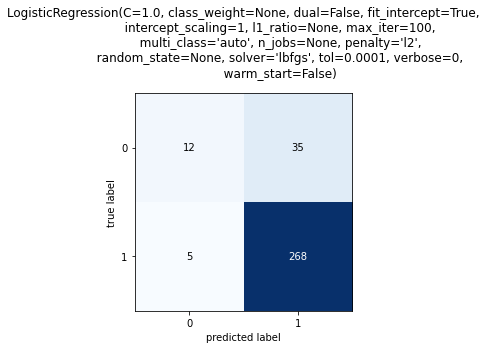

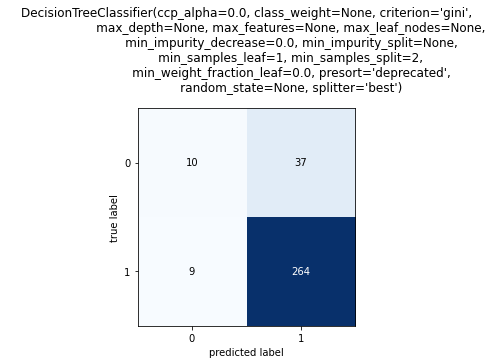

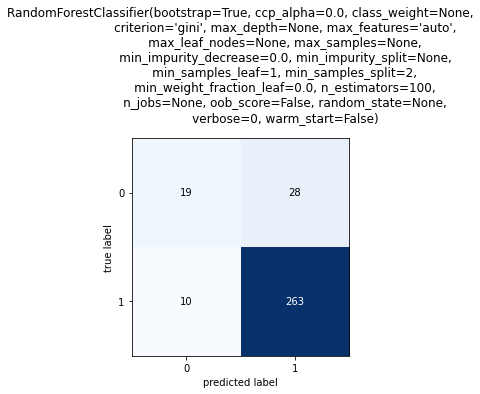

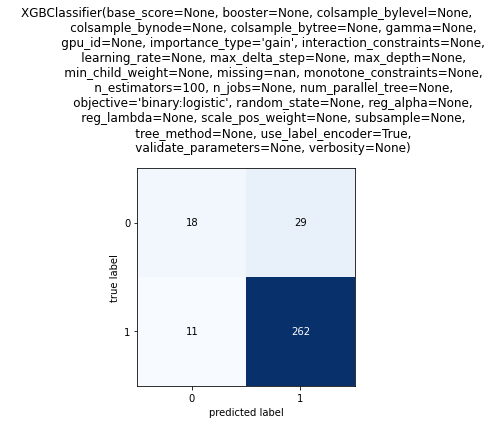

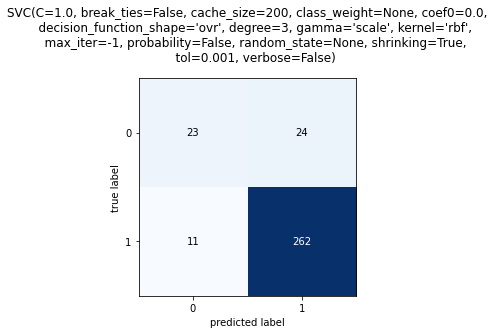

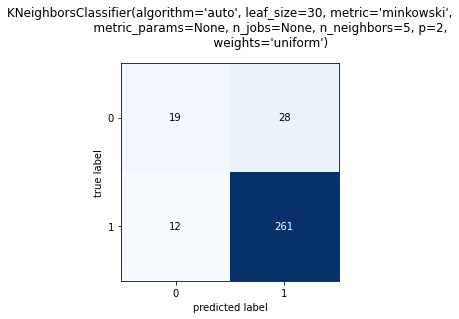

In [883]:
#Główna pętla: uczenie, predykcja, 
results = []
for i in range(len(params)):
    clf = GridSearchCV(
    models[i], params[i]
    )
    result = clf.fit(X_train, y_train)
    result.best_score_
    print(result.best_estimator_)
    y_pred = result.best_estimator_.predict(X_test)
    
    print(classification_report(y_test, y_pred))
    plot_confusion_matrix(confusion_matrix(y_test, y_pred))
    plt.title(models[i])
    results.append(result.best_score_)
 

In [884]:
#best score
models_list = [str(model) for model in models]
for i in range(len(results)):
    models_list[i] += " : " + str(round(results[i], ndigits=4) )
models_list

["LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,\n                   intercept_scaling=1, l1_ratio=None, max_iter=100,\n                   multi_class='auto', n_jobs=None, penalty='l2',\n                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,\n                   warm_start=False) : 0.8851",
 "DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',\n                       max_depth=None, max_features=None, max_leaf_nodes=None,\n                       min_impurity_decrease=0.0, min_impurity_split=None,\n                       min_samples_leaf=1, min_samples_split=2,\n                       min_weight_fraction_leaf=0.0, presort='deprecated',\n                       random_state=None, splitter='best') : 0.8866",
 "RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,\n                       criterion='gini', max_depth=None, max_features='auto',\n                       max_leaf_nodes=None, max_samples=N

In [888]:
print(models_list[2])

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) : 0.9015


In [885]:
#Listra stringów dla lepszego wyświetlenia wyników 
model = [
    'LogisticRegression',
    'DecisionTreeClassifier',
    'RandomForestClassifier',
    'XGBClassifier',
    'SVC',
    'KNeighborsClassifier'
]

In [886]:
#Czytelniejsza forma wyników (best score)
for i in range(len(results)):
    model[i] += " : " + str(round(results[i], ndigits=4) ) 
model

['LogisticRegression : 0.8851',
 'DecisionTreeClassifier : 0.8866',
 'RandomForestClassifier : 0.9015',
 'XGBClassifier : 0.9007',
 'SVC : 0.8944',
 'KNeighborsClassifier : 0.8718']

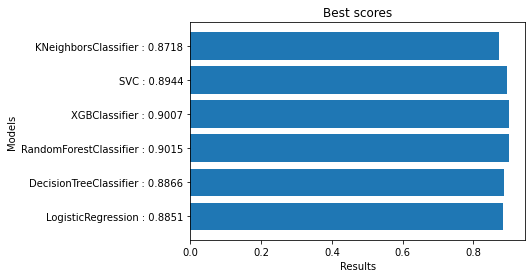

In [887]:
#Wykres przedstawiaący najlepszy score
fig = plt.Figure(figsize=(30,30))
plt.barh(model, results)
plt.xlabel("Results")
plt.ylabel("Models")
plt.title("Best scores")
plt.show()